## COMP3670/6670 Programming Assignment 1 - Linear Algebra and Analytic Geometry
---

**Enter Your Student ID:** u6828533

**Your Name:** Yuxuan Lin
    
**Deadline:** 11:59pm, Aug 29th, 2021

**Submit:** Write your answers in this file, and submit a single Jupyter Notebook file (.ipynb) on Wattle. Rename this file with your student number as 'u6828533.ipynb'.

**Enter Discussion Partner IDs Below:**
You could add more IDs with the same markdown format above.



---
**Marking distribution for the homework/assignment**

- Task1 = 10%
- Task2 = 30%
- Task3 = 10%
- Task4 = 50%

## Task 0: Introduction
---

**NOTE:** *This part of the first assignment is by necessity somewhat tedious as its primary purpose is to introduce syntax, how to access and understand the Numpy documentation and some very basic concepts. If you are already familiar with Numpy, you can just read the **TASK** headings and complete the questions without worrying about all the additional information. This is designed for people who have never seen Numpy before, so it's a very easy 1st year style introduction to just introduce syntax.*

*As this is a third year subject, it is assumed you already know to to program well (but may be unfamiliar with Python and Numpy).*

---

Arguably the most fundamental tool needed to engage with machine learning in Python is Numpy *(np)*. To include Numpy in any project, simply type the following line at the top of your python file:

In [1]:
# numpy
import numpy as np

!pip install sympy
import sympy as sp

# matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

A Jupyter Notebook is divided into cells, each of which works like a Python module or Latex file. When a cell is run, any cells that follow it will have access to its results. Running the above cell will give all following cells access to the Numpy library.

-----------

   **TASK 0.1:** To run the above cell, select it by clicking on it, hold **shift** and press **return**. If you have succeeded, then the cell will print "Done" just above.


-----------

Numpy is a library of common mathematical data structures and algorithms used in machine learning. For example:

- It allows you to declare vectors and matrices, with all the associated mathematical operations like matrix vector products, matrix addition / subtraction.
- It provides convenient, efficient implementations of algorithms to solve matrix equations, find the inverse of a matrix or perform Eigen decomposition. The implementation of these algorithms is compiled from C code, making Numpy much faster than programming these algorithms yourself in Python.

You'll need to know Numpy inside and out. We'll start by getting you familiar with the easy to access online documentation and performing a few basic operations.

Below I have declared the matrices: 

$$A = 
\begin{bmatrix}
2&3\\
0&1\\
\end{bmatrix}
\\
x = 
\begin{bmatrix}
1\\
3\\
\end{bmatrix}
$$. 

---
**TASK 0.2:** Run the cell below and observe what it prints.


---
(If it throws an error, you have the wrong version of python installed. This entire course will use Python 3, not Python 2)



In [2]:
A = np.array([[2, 3], [0, 1]])
x = np.array([[1], [3]])

#Matrix Multiplication Example
b = A @ x
print('\nMatrix Multiplication')
print(b)


Matrix Multiplication
[[11]
 [ 3]]


The above code illustrates how to perform matrix multiplication. Memorise it. Below are some other basic operations you'll likely need over the coming semester:

In [3]:
#Matrix Addition Example
b = A + x
print('\nMatrix Addition')
print(b)

#Elementwise Multiplication Example
b = A * x
print('\nElementwise Matrix Multiplication')
print(b)

#Extract a single element of a matrix:
print('\nSingle Element Extraction')
b = A[0, 0]
print(b)

#Extract an entire column of a matrix:
print('\nColumn Extraction')
b = A[:, 0]
print(b)

#Extract an entire row of a matrix:
print('\nRow Extraction')
b = A[0, :]
print(b)

#Transpose of a matrix:
print('\nTranspose')
A_Transpose = A.T
print(A_Transpose)


Matrix Addition
[[3 4]
 [3 4]]

Elementwise Matrix Multiplication
[[2 3]
 [0 3]]

Single Element Extraction
2

Column Extraction
[2 0]

Row Extraction
[2 3]

Transpose
[[2 0]
 [3 1]]


## Task1: Solving a system of linear equations
---

A vital part of linear algebra is to know how to solve a system of linear equations. For e.g. 

$$a_{11}x_1+a_{12}x_2 \dots a_{1d}x_d=b_1$$
$$a_{21}x_1+a_{22}x_2 \dots a_{2d}x_d=b_2$$
$$\vdots$$
$$a_{n1}x_1+a_{n2}x_2 \dots a_{nd}x_d=b_n$$

The above system of linear equations can also be written down in a compact matrix form as follows:

$$AX = B$$

where,
$$A = \begin{bmatrix}
a_{11} & \dots & a_{1d}\\
\vdots & \ddots & \vdots \\
a_{n1} & \dots & a_{nd}
\end{bmatrix}, \quad
B = \begin{bmatrix}
b_1 \\ \vdots \\ b_n
\end{bmatrix}, \quad
X = \begin{bmatrix}
x_1 \\ \vdots \\ x_d
\end{bmatrix}.
$$

---
**Task 1.1**: Use numpy's solve function to compute X

---
**HINT**: https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html

In [4]:
# define A,B
A = np.array([[2, 3, 4], [0, 1, 3], [-1, 0, 2]])
B = np.array([[3], [5],[7]])

def solve_with_numpy(A,B):
    return(np.linalg.solve(A, B))

# show solution
X = solve_with_numpy(A,B)
print(X)

[[-11.]
 [ 11.]
 [ -2.]]


A more hands on way for solving for X, involves computing first computing the inverse of the matrix $A$

---
**Task 1.2**: Use numpy's inbuilt method for computing the inverse of the matrix $A$

---

**HINT**: https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html

In [5]:
A = np.array([[2, 3, 4], [0, 1, 3], [-1, 0, 2]])

A_inv = np.linalg.inv(A)
print(A_inv)

[[-2.  6. -5.]
 [ 3. -8.  6.]
 [-1.  3. -2.]]


---
**Task 1.3**: Use the inverse of matrix $A$, to solve for $X$

---

In [6]:
A = np.array([[2, 3, 4], [0, 1, 3], [-1, 0, 2]])
B = np.array([[3], [5], [7]])

X = np.linalg.inv(A) @ B
print(X)

[[-11.]
 [ 11.]
 [ -2.]]


But what if $A$ is not a square matrix?

---
**Task 1.4**: Compute the Moore-Penrose pseudo inverse for matrix $A$ and use it for computing $X$. Note that, you must not directly use `np.linalg.pinv` for computing the pseudo-inverse.

---

**HINT**: https://en.wikipedia.org/wiki/Moore–Penrose_inverse

In [7]:
A = np.array([[1, 3], [2, 7], [5, 1]])
B = np.array([[13], [30], [9]])

A_pseudo_inverse = np.linalg.inv(A.T @ A) @ A.T
X = A_pseudo_inverse @ B
print(X)

[[1.]
 [4.]]


## Task 2: Gaussian elimination

Lets practice Gaussian elimination without numpy!

---
**Task 2.1**:  Complete the following gaussian elimnation function to compute the **reduced row-echelon form** of matrix $A$. You must implement the gaussian elimination algorithm yourself, not merely call someone elses library function. You **MUST NOT** copy codes from any source. Your function needs to fit different shapes of matrices.

---

**HINT:** https://en.wikipedia.org/wiki/Gaussian_elimination

In [8]:
"""
hint: Pseudocode for reduced row echelon form
url: https://en.wikipedia.org/wiki/Row_echelon_form
"""


def gaussian_elim(X):
    R, C = X.shape  # get the number of rows and columns in X
    X, p = np.float64(X), 0  # cast the elements matrix to float, initialize pivot element

    for r in range(R):
        if C > p:
            i = r
            while X[i, p] == 0:
                i += 1
                if R == i:
                    i = r
                    p += 1
                    if C == p:
                        p -= 1
                        break
            if i != r:
                X[[i, r]] = X[[r, i]]  # swap rows i and r
            if X[r, p] != 0:
                X[r] /= X[r, p]  # divide row r by X[r, p]
            for i in range(R):
                if i != r:
                    X[i] -= X[i, p] * X[r]  # subtract X[i, p] multiplied by row r from row i
            p += 1

    return X


In [9]:
A = np.array([[1, 0, 1, 1],
             [1, 0, 1, 1],
             [0, 1, 1, 1],
             [1, 1, 1, 0],
             [1, 1, 1, 0]], dtype=np.float64)
print(gaussian_elim(A))
#The result should look like
# [[ 1.,  0.,  0., -1.],
#  [ 0.,  1.,  0., -1.],
#  [-0., -0.,  1.,  2.],
#  [ 0.,  0.,  0.,  0.],
#  [ 0.,  0.,  0.,  0.]]

[[ 1.  0.  0. -1.]
 [ 0.  1.  0. -1.]
 [-0. -0.  1.  2.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


In [10]:
B = np.array([[2, 0, 3, 1, 0, 2],
             [1, 3, 2, 0, 3, 1],
             [3, 2, 3, 1, 1, 2]])
print(gaussian_elim(B))
#The result should look like
# [[ 1.          0.          0.          0.36363636 -0.81818182  0.18181818]
#  [ 0.          1.          0.         -0.18181818  0.90909091 -0.09090909]
#  [ 0.          0.          1.          0.09090909  0.54545455  0.54545455]]

[[ 1.          0.          0.          0.36363636 -0.81818182  0.18181818]
 [ 0.          1.          0.         -0.18181818  0.90909091 -0.09090909]
 [-0.         -0.          1.          0.09090909  0.54545455  0.54545455]]


We will evaluate your code with multiple different matrices.

---
**Task 2.2**:  If a square matrix is invertible, how would its reduced row-echelon form looks like? Use no more than 3 sentences in your answer. 

---
**Answer**:
<font color='red'>
The reduced row-echelon form of an invertible square matrix will be an identity matrix of the same size.

## Task 3: Geometrical intuition for system of linear equations

---

In this task we will develop a geometrical intuition for solving the system of linear equations:

$$AX=B$$

where if you recall from before:

$$A = \begin{bmatrix}
a_{11} & \dots & a_{1d}\\
\vdots & \ddots & \vdots \\
a_{n1} & \dots & a_{nd}
\end{bmatrix}, \quad
B = \begin{bmatrix}
b_1 \\ \vdots \\ b_n
\end{bmatrix}, \quad
X = \begin{bmatrix}
x_1 \\ \vdots \\ x_d
\end{bmatrix}.
$$

This can also be written as:
$$
\begin{bmatrix}
a_{11} \\ \vdots \\ a_{n1}
\end{bmatrix} \ x_1
+ 
\begin{bmatrix}
a_{12} \\ \vdots \\ a_{n2}
\end{bmatrix} \ x_2
+ \dots
\begin{bmatrix}
a_{1d} \\ \vdots \\ a_{nd}
\end{bmatrix} \ x_d
= \begin{bmatrix}
b_1 \\ \vdots \\ b_n
\end{bmatrix}
$$

Thats is, solving the system of linear equations $AX=B$ is equivalent to finding a linear combination of the column vectors of matrix $A$, that result in $B$.

---
**Task 3.1**: Given a matrix $A$ of shape (2 X 2), generate a plot containing arrows representing the column vectors of $A$.

---
**HINTS:** 

- For $A=I$, the plot should look something like:
![title](https://upload.cc/i1/2019/08/01/LqQUbB.png)
- You'll need to use plt.quiver() with angles='xy', scale_units='xy' and scale=1. 
    - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.quiver.html

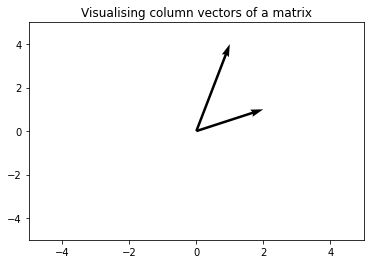

In [11]:
origin = [0], [0]
A = np.array([[2, 1], [1, 4]])

x_pos, y_pos = origin

x_dir, y_dir = A[0][0], A[1][0]
plt.quiver(x_pos, y_pos, x_dir, y_dir, angles='xy', scale_units='xy', scale=1)

x_dir, y_dir = A[0][1], A[1][1]
plt.quiver(x_pos, y_pos, x_dir, y_dir, angles='xy', scale_units='xy', scale=1)

plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.title('Visualising column vectors of a matrix')
plt.show()

---
**Task 3.2**: To the above plot, now add an arrow (with different color) representing vector $B$. While doing so remember to:
* Assign different labels to the arrows for matrix $A$ and $B$, using the keyword `label=A` or `label=B`.
* Display the appropriate legend, with proper labels. Read more: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html
* Assign colored arrows for matrix $A$ as `color=blue` and arrow for vector $B$ as `color=red`
---

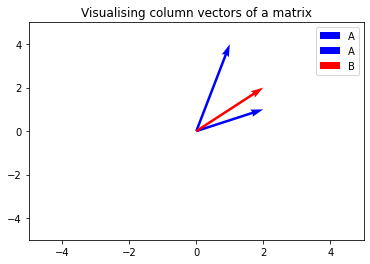

In [12]:
origin = [0], [0]

A = np.array([[2, 1], [1, 4]])
B = np.array([[2], [2]])

x_pos, y_pos = origin

x_dir, y_dir = A[0][0], A[1][0]
plt.quiver(x_pos, y_pos, x_dir, y_dir, angles='xy', scale_units='xy', scale=1, color='blue', label='A')

x_dir, y_dir = A[0][1], A[1][1]
plt.quiver(x_pos, y_pos, x_dir, y_dir, angles='xy', scale_units='xy', scale=1, color='blue', label='A')

x_dir, y_dir = B[0][0], B[1][0]
plt.quiver(x_pos, y_pos, x_dir, y_dir, angles='xy', scale_units='xy', scale=1, color='red', label='B')

plt.xlim([-5,5])
plt.ylim([-5,5])
plt.legend()
plt.title('Visualising column vectors of a matrix')
plt.show()

The above plot should convey a more intuitve picture than the simply looking at $AX=B$. Let's test our intuition!

---
**Task 3.3**: Without calculating, for $X = [x_1 \ x_2]^T$, analytically comment on the magnitude of $x_1$ and $x_2$. That is first choose one of the following and then use no more than 3 sentences to explain your choice. 
1. $|x_1| > |x_2|$
2. $|x_1| < |x_2|$
3. $|x_1| \approx |x_2|$

---

**Answer**:
<font color='red'>
$|x_1| > |x_2|$. 
    
<font color='red'>
Because from the plot above, the magnitude of $B$'s orthogonal projection on $A$'s first column vector is greater than the magnitude of $B$'s orthogonal projection on $A$'s second column vector.

## Task 4: Gram-Schmidt orthogonalization

The Gram-Schmidt algorithm is used for finding an orthonormal basis for the subspace spanned by a set of vectors.

Given a linearly independent set of vectors $S = \lbrace \mathbf{v_1}, \mathbf{v_2}, ..., \mathbf{v_n} \rbrace$, an orthogonal set $S' = \lbrace \mathbf{u_1}, \mathbf{u_2}, ..., \mathbf{u_n} \rbrace $ can be generated under this procedure:


$\mathbf{u_1} = \mathbf{v_1}$\
$\mathbf{u_2} = \mathbf{v_2} - \textrm{proj}_{\mathbf{u_1}}(\mathbf{v_2})$\
$\mathbf{u_3} = \mathbf{v_3} - \textrm{proj}_{\mathbf{u_1}}(\mathbf{v_3}) - \textrm{proj}_{\mathbf{u_2}}(\mathbf{v_3})$\
...\
$\mathbf{u_n} = \mathbf{v_n} - \sum_{i=1}^{n-1}\textrm{proj}_{\mathbf{u_i}}(\mathbf{v_n})$,

where $\textrm{proj}_{\mathbf{u}}(\mathbf{v}) = \dfrac{\langle \mathbf{u}, \mathbf{v} \rangle}{\langle \mathbf{u}, \mathbf{u} \rangle}\mathbf{u}$

The orthogonal set is not normalized, you can normalize it by $\mathbf{e_i} = \dfrac{\mathbf{u_i}}{||\mathbf{u_i}||}$

---
**Read more:** https://en.wikipedia.org/wiki/Gram–Schmidt_process

---
**Task 4.1**: Implement a function that finds an orthonormal basis of column vectors for matrix $A$. The *gram_schmidt* function should be according to following specifications: 
* Take as input any matrix $A$.
* Return a matrix with the orthonormal basis vectors as the columns.

---
**NOTE**: The resulting basis should be orthonormal, so each basis vector should be of norm 1.

In [13]:
# Find orthonormal basis using gram-schmidt 
def gram_schmidt(A):
    orthonormal_basis = []
    
    # YOUR CODE HERE
    
    return np.array(orthonormal_basis)

print(gram_schmidt(A))

[]


---
**TASK 4.2:** Implement a function that accepts a matrix and returns TRUE if all the columns of that matrix are orthogonal to one another, and each one of them is of length 1 (the L2 norm of each column vector is 1).

Use this function to verify the output of your gram_schmidt function is an orthonormal basis for $A$.

Again, you must program this function yourself, rather than relying on a library function.

---

**HINT:** 
- A pair of column vectors $v_1$ and $v_2$ are orthogonal to one another if and only if $v_1^Tv_2 = 0$. They form an orthonormal basis if they are all orthogonal to eachother, and they are each of length 1. https://en.wikipedia.org/wiki/Orthogonality
- You can check whether your algorithms work using the last 6 lines in the code given below.

In [14]:
def orthogonality_checker(A):
    # YOUR CODE HERE
    return

true_test = np.eye(3,3)
false_test = np.ones((3,3))
print('\nCHECKING TRUE TEST (SHOULD RETURN TRUE):')
print(orthogonality_checker(true_test))
print('\nCHECKING FALSE TEST (SHOULD RETURN FALSE):')
print(orthogonality_checker(false_test))


CHECKING TRUE TEST (SHOULD RETURN TRUE):
None

CHECKING FALSE TEST (SHOULD RETURN FALSE):
None
